In [ ]:
# 하둡으로 저장된 파일 불러오기
f2011 = spark.read.format("csv").load("/user/ubuntu/homework/flights/csv/2011-summary.csv")   #옵션을 안걸었음
f2011 = spark.read.option("header", "true").csv("homework/flights/csv/2011-summary.csv") 

In [ ]:
# 하둡으로 불어온 f2011로 테이블 만들기
f2011.createOrReplaceTempView("flights2011")

In [ ]:

# dataframe 에서 불러오기
f2011.groupBy("DEST_COUNTRY_NAME").count().show()

In [ ]:
#테이블에서 불러오기
spark.sql("SELECT DEST_COUNTRY_NAME, COUNT(1) FROM flights2011 GROUP BY DEST_COUNTRY_NAME").show()

In [ ]:
#테이블에서 불러오기
spark.sql("SELECT MAX(count) FROM flights2011").show()

In [ ]:
# dataframe 에서 불러오기
from pyspark.sql.functions import max
f2011.select(max("count")).show()

In [ ]:
#테이블에서 불러오기
spark.sql("SELECT  DEST_COUNTRY_NAME, ORIGIN_COUNTRY_NAME FROM flightS2011  LIMIT 5" ).show()

In [ ]:
# dataframe 에서 불러오기
f2011.select("DEST_COUNTRY_NAME", "ORIGIN_COUNTRY_NAME").show(5)

In [ ]:
# 테이블에서 불러오기
spark.sql("select DEST_COUNTRY_NAME from flights2011 limit 5").show()

In [ ]:
# dataframe 에서 불러오기
from pyspark.sql.functions import col
f2011.select(col("DEST_COUNTRY_NAME")).show(5)


In [ ]:
# 테이블에서 불러오기
spark.sql("SELECT DEST_COUNTRY_NAME as destination  FROM flights2011").show(5)

In [ ]:
# 데이터 프레임에서 불러오기
from pyspark.sql.functions import expr
f2011.select(expr("DEST_COUNTRY_NAME AS destination")).show(5)
f2011.select(col("DEST_COUNTRY_NAME").alias("destination")).s+how(5)
f2011.select(expr("DEST_COUNTRY_NAME").alias("destination")).show(5)


In [ ]:
# selectExpr = select + expr
f2011.selectExpr("DEST_COUNTRY_NAME as destination").show(5)

In [ ]:
# 조건걸어보기!!

In [ ]:
# 테이블에서 불러오기
spark.sql("SELECT *, (DEST_COUNTRY_NAME = ORIGIN_COUNTRY_NAME) as DOMESTIC_FLIGHT FROM flights2011").show()

In [ ]:
# 데이터프레임에서 불러오기
f2011.selectExpr("*", "(DEST_COUNTRY_NAME = ORIGIN_COUNTRY_NAME) as DOMESTIC_FLIGHT").show(100)

In [ ]:
#테이블에서 불러오기
spark.sql("SELECT AVG(count), COUNT(DISTINCT(DEST_COUNTRY_NAME)) FROM flights2011").show()

In [ ]:
# 데이터프레임에서 불러오기
f2011.selectExpr("avg(count)", "count(distinct(DEST_COUNTRY_NAME))").show()


In [ ]:
# lit = literal (값)
# 모든 행에 1이라는 값을 넣어주기!!

In [ ]:

#테이블에서 불러오기
spark.sql("SELECT *, 1 as one FROM flights2011").show(100)

In [ ]:
# 데이터 프레임에서 불러오기
from pyspark.sql.functions import lit
f2011.select(expr("*"), lit(1).alias("one")).show(100)

In [ ]:
#응용한다면 이런식도 됨
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, lit
import datetime
f2011.select(expr("*"),lit(datetime.datetime.now().strftime('%Y%m%d'))).show(100)
f2011.select(expr("*"),lit(datetime.datetime.now().strftime('%Y%m%d')).alias('load_dt')).show(100)

In [ ]:

# withColumn("컬럼명", "표현식")
# 컬럼을 추가할껀데 어떤 표현식을 가지는 컬럼명을 추가한다.

In [ ]:
#테이블에서 불러오기
spark.sql("SELECT *, (DEST_COUNTRY_NAME = ORIGIN_COUNTRY_NAME) AS DOMESTIC_FLIGHT FROM flights2011").show()

In [ ]:

# 데이터 프레임에서 불러오기
f2011.withColumn("DOMESTIC_FLIGHT", expr("DEST_COUNTRY_NAME = ORIGIN_COUNTRY_NAME")).show()

In [ ]:
# withColumnRenamed
# 원본 컬럼이름을 바꿀 컬럼이름으로 바꿔주겠다.즉 이름만 바꾼다.

In [ ]:
#  테이블에서 불러오기
spark.sql("select DEST_COUNTRY_NAME as DESTINATION, ORIGIN_COUNTRY_NAME,count  from flights2011").show(5)


In [ ]:
# 데이터 프레임에서 불러오기
f2011.withColumnRenamed("DEST_COUNTRY_NAME", "DESTINATION").show(5)

In [ ]:
withColumn, withColumnRenamed  둘다 원본반영안됨!.따라서 새로운 변수를 만들어줘야 한다.

In [ ]:
# 컬럼 확인용
f2011.columns

In [ ]:
# 테이블에서 가져오기
spark.sql("SELECT * FROM flights2011 WHERE count < 2").show(5)

In [ ]:
# 데이터 프레임에서 가져오기
f2011.filter(col("count") < 2).show(5)
f2011.where("count < 2").show(5)

In [ ]:

#테이블에서 불러오기
spark.sql("SELECT * FROM flights2011 WHERE count < 2 AND ORIGIN_COUNTRY_NAME != 'Croatia'").show(5)

In [ ]:
# 데이터 프레임에서 불러오기
f2011.where("count < 2").where(col("ORIGIN_COUNTRY_NAME") != "Croatia"). show(5)


In [ ]:
#  데이터 프레임에서 where 여러개 조건 연결(다른 함수도 마찬가지) -> 스파크에서는 조건이 여러개 연결되면 하나하나 순서대로 실행된다가 아니라 동시에 모든 조건 실행(병렬실행)-->즉 동시에 모든 조건 실행한다. => 특정 상황에서 원하지 않는 결과가 도출 될 수 있다!!!

In [ ]:
# 다른결과가 나온다.위에꺼와 같게하려면 어찌해야될까..where를 여러번 안쓰고..흐음.밑에꺼는 안된다.
f2011.where(("count < 2") and (col("ORIGIN_COUNTRY_NAME") != "Croatia")). show(5)

In [ ]:
# 생각해볼고민거리 explain() 실행계획

In [ ]:
f2011.select("ORIGIN_COUNTRY_NAME", "DEST_COUNTRY_NAME").distinct().explain()


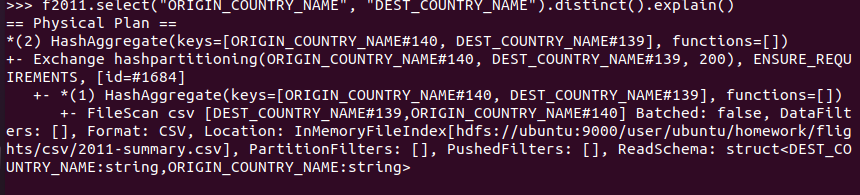

In [ ]:
#테이블에서 가져오기
spark.sql("""SELECT COUNT(DISTINCT(ORIGIN_COUNTRY_NAME, DEST_COUNTRY_NAME)) AS count FROM flights2011""").show(5)
파이썬에서는 """ """ 는 줄바꿈하더라도 연속적인코드임을 알수있게끔할떄.이거 쓰기 싫으면 걍 아래같이 쭉 한줄로 써야할꺼다. 
spark.sql("SELECT COUNT(DISTINCT(ORIGIN_COUNTRY_NAME, DEST_COUNTRY_NAME)) AS count FROM flights2011").show()

In [ ]:
# 데이터프레임에서 가져오기
f2011.select("ORIGIN_COUNTRY_NAME", "DEST_COUNTRY_NAME").distinct().count()
# count해서 show()는 에러남..

In [ ]:
# row함수
from pyspark.sql import Row

# 새로운 테이블 스키마 생성
schema = f2011.schema

#새로운 테이블생성
new_rows = [
	Row("Korea", "Korea", 5),
	Row("Korea", "Australia", 1)
]

# rdd객체 가져오기
paralle_rows = sc.parallelize(new_rows)

# 데이터 프레임만들기-()안처럼~~만들어달라
new_df = spark.createDataFrame(paralle_rows, schema)
f2011.union(new_df).show(10000) #union 합집합

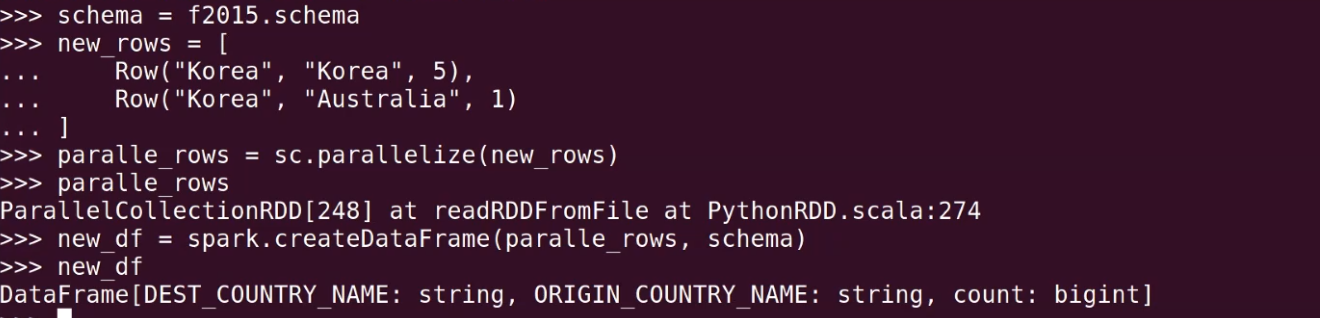


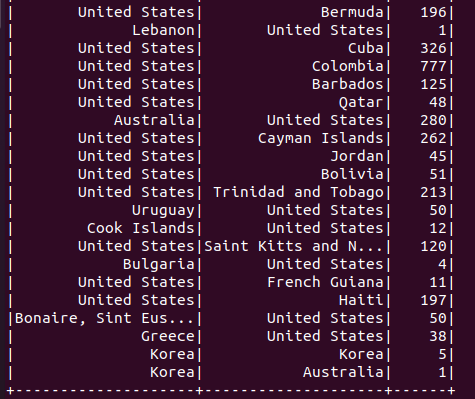

In [ ]:
#row함수를 이용해서 지금까지 내용을 복습하겠다.

spark에서 제공하는 데이터구조는 rdd와 dataframe이 대표적이다.
rdd는 schema를 정하지 않는 것과 달리 dataframe은 모델 schema를 설정해서 사용해야 한다.

column은 dataframe의 열에 해당하고 data type을 갖는다.
row는 dataframe의 행으로,데이터 요소 항목을 묶어서 구성한다.
python에서 list혹은 dictionary를 사용해서 row를 구성할 수 있다.

data type으로는 null type,string type, binary type, boolean type, data type,timestamp type,double type,
decimal type,short type, array type, map type 이러한 data type들이 존재한다.

In [ ]:
주요 api

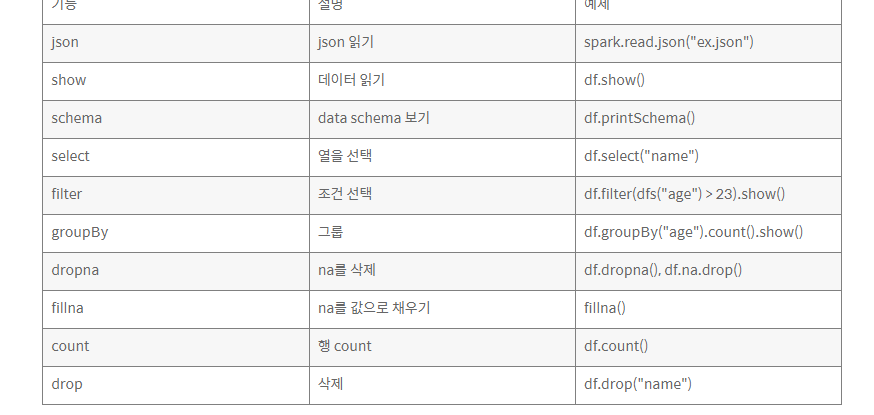

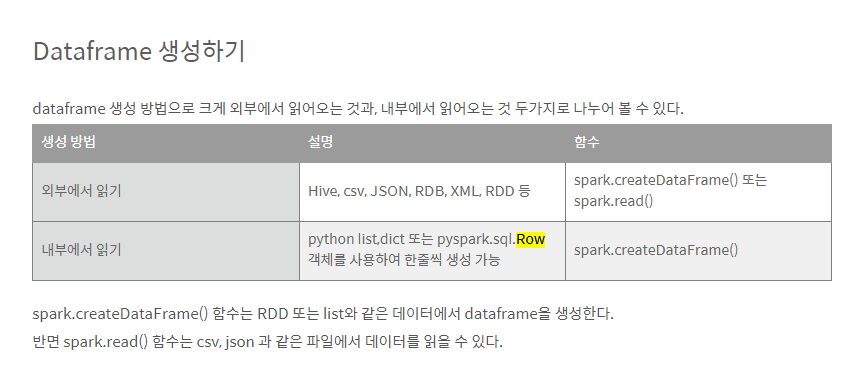

In [ ]:
# schema 자동 인식해서 dataframe생성

In [ ]:
파이썬을 사용해서 datafrmame을 생성해보자

In [ ]:


dataframe
mylist=[
	('1', 'park,aa', 190),
	('1', 'lee,aa', 195),
	('1','lim,bb',200),
	('2','lee',195)
]


mydf=spark.createDataFrame(mylist)
mydf.printSchema()
print(mydf.take(1))

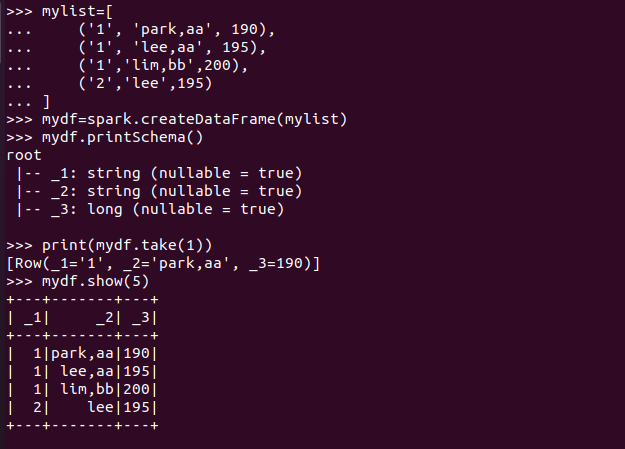

In [ ]:
dataframe를 생성시 spark가 자동으로 schma를 설정
생성한 dataframe을 printschema()를 통해 schema를 출력한다면 컬럼명은 _1,_2,_3과 같이 생성됨
data type도 알아서 유추되나 올바르게 생성이 안될경우도 생긴다.
현재 컬럼명을 설정하지 않고 프린트 하였기 떄문에 컬럼명이  _1,_2,_3이런식으로 생성되었다.
이다음에는 컬럼명을 생성해서 해보자.

In [ ]:
mylist=[
	('1', 'park,aa', 190),
	('1', 'lee,aa', 195),
	('1','lim,bb',200),
	('2','lee',195)
]
myDf_with_columnname=spark.createDataFrame(mylist,['year','name','height'])
myDf_with_columnname.printSchema()
print(myDf_with_columnname.take(1))
myDf_with_columnname.show()

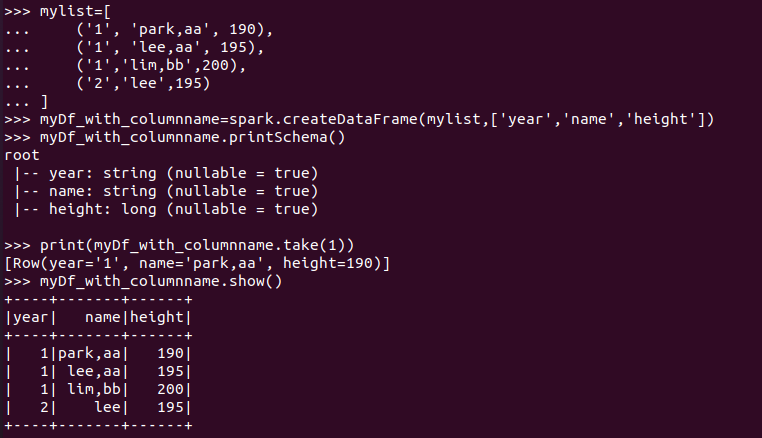

In [ ]:

#row 객체를 사용해서 dataframe을 생성
from pyspark.sql import SparkSession
from pyspark.sql import Row
person=Row('year','name','height')
row1=person('1','park,aa',190)
row2=person('1','lee,aa',195)
row3=person('1','lim,bb',200)
row4=person('2','lee',195)

myrows=[row1,
	row2,
	row3,
	row4]

mydf_row=spark.createDataFrame(myrows)
mydf_row.printSchema()
print(mydf_row.take(1))
mydf_row.show()



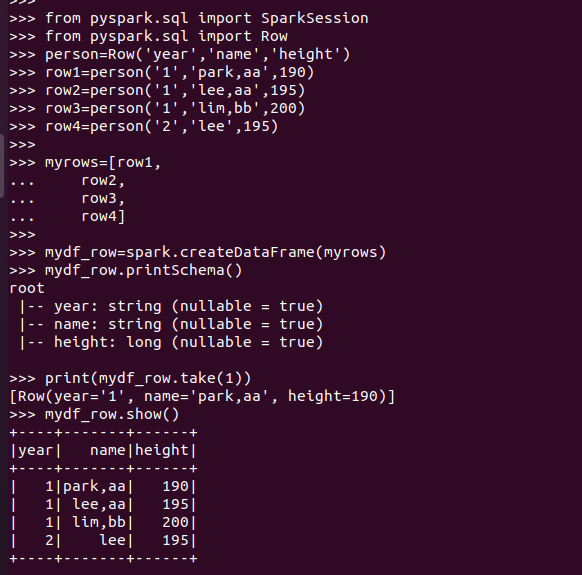

In [ ]:
#   schema정의하고 dataframe 생성하기
    data type를 정의 한후에 dataframe을 생성

from pyspark.sql import Row

person=Row('year','name','height')
row1=person('1','park,aa',190)
row2=person('1','lee,aa',195)
row3=person('1','lim,bb',200)
row4=person('2','lee',195)

myrows=[row1,
	row2,
	row3,
	row4]

from pyspark.sql.types import StructType, StructField
from pyspark.sql.types import StringType, IntegerType
mySchema=StructType([
	StructField('year',StringType(),True),
	StructField('name',StringType(),True),
	StructField('height',IntegerType(),True)
])

myDf_schema=spark.createDataFrame(myrows,mySchema)
myDf_schema.printSchema()
myDf_schema.take(1)
myDf_schema.show()


# mySchema 처럼 data type을 설정한 이후에 schema를 생성 할 수도 있다.
# 이후 생성해 놓은 myrows와 mySchema를 이용해서 dataframe을 생성하였다 

# RDD에서 생성하기

In [ ]:
RDD는 schema가 정해지 않은 비구조적 데이터 이다. 따라서 schema를 따로 정의하지 않으면 schema를 유추해서 dataframe을 생성
RDD에서 schema 자동인식및 schema 정의하고 dataframe 생성하는 방법은 두가지 있다.

# Schema 자동 인식(따로  Schema 정의안한경우)

In [ ]:
toDF( )로 변환하거나 createDataFrame( )을 사용하여 dataframe 을 생성하는 2가지 방법이 존재

## toDF( )

In [ ]:
먼저 list에서 RDD를 생성한다

### RDD-SCHEMA 자동인식

In [ ]:
mylist=[
	('1', 'park,aa', 190),
	('1', 'lee,aa', 195),
	('1','lim,bb',200),
	('2','lee',195)
]

In [ ]:
myRdd=spark.sparkContext.parallelize(mylist)

In [ ]:
이후 생성된 RDD를 toDF( )를 통해 dataframe으로 변환

### toDF( )

In [ ]:
rddDf=myRdd.toDF( )
rddDf.printSchema()
rddDf.show()

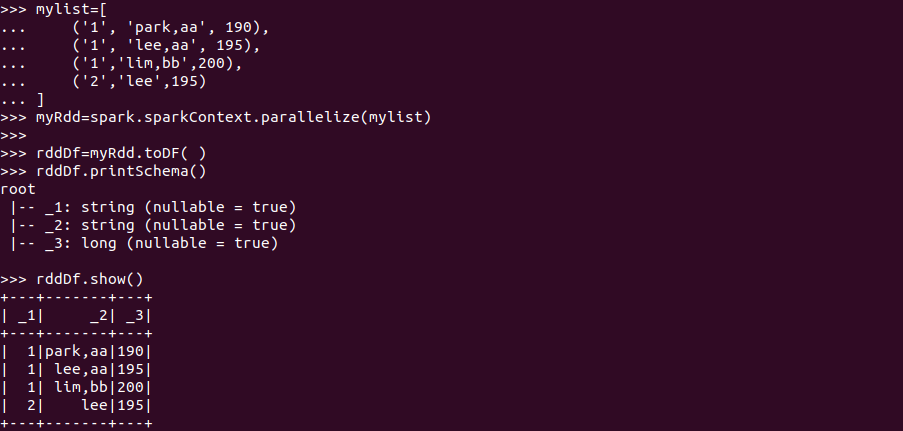


## createDataFrame()

In [ ]:
두번째 방법으로 createDataFrame()생성

In [ ]:
rddDf1=spark.createDataFrame(myRdd)
rddDf1.printSchema()
rddDf1.show()

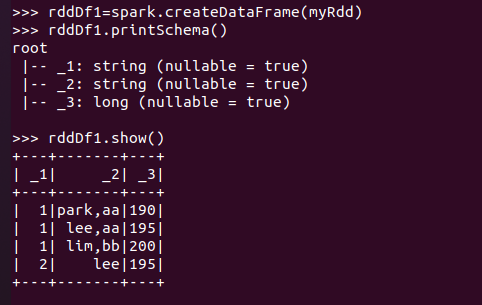

In [ ]:
# dataframe은 DBMS의 테이블과 매우 유사하다.SQL과 비슷 
따라서 WHERE().SELECT().GROUPBY()함수등이 사용가능하다.

In [ ]:
# DBMS와 유사한 dataframe

In [ ]:
rddDf.where(rddDf._3>=195).select([rddDf._1,rddDf._2]).show()
# rddDf.select([rddDf._1,rddDf._2]).where(rddDf._3>=195).show()

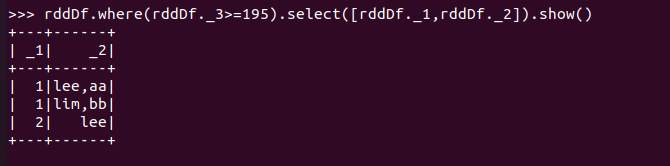

In [ ]:
# where,select 를 이용해서 컬럼_3이 195 이상인 행들의 컬럼_1,)2값들을 show(0)

In [ ]:
rddDf.groupby(rddDf._1).max().show()

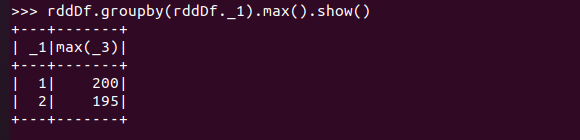

In [ ]:
# 컬럼_1 값으로 groupby 한 이후 같은 최대값 max()를 구한것.
# groupby 하면 행의 값으로 구분 지어서 평균,갯수.최대.최소등을 구할 수 있다.

# schema 정의하고 dataframe생성

In [ ]:

mylist=[
	('1', 'park,aa', 190),
	('1', 'lee,aa', 195),
	('1','lim,bb',200),
	('2','lee',195)
]

myRdd=spark.sparkContext.parallelize(mylsit)

mySchema=StructType([
	StructField('year',StringType(),True),
	StructField('name',StringType(),True),
	StructField('height',IntegerType(),True)
])

myDf_schema=spark.createDataFrame(myRdd,mySchema)

myDf_schema.printSchema()

myDf_schema.show()


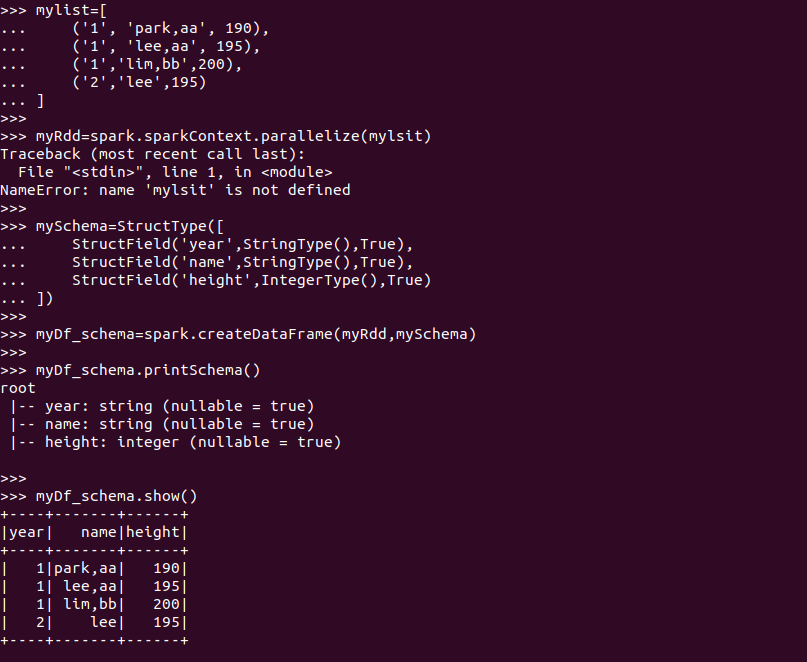

In [ ]:
spark.sql("SELECT * FROM flights2011 ORDER BY count ASC").show(f2011.count())

In [ ]:
f2011.orderBy(col("count").asc()).show(f2011.count())
f2011.sort("count").show(f2011.count())